In [1]:
%matplotlib inline
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import pandas as pd
import sys
import torch
import os
from natsort import natsorted

import matplotlib.pyplot as plt
import seaborn as sns

from vtk.util import numpy_support
import vtk

# sys.path.append("C:/Users/JAVIER/OneDrive/Escritorio/ETH/Year 2/Spring 2023/Semester Project/CMR_Internship")
sys.path.append("C:/Users/JAVIER/OneDrive/Escritorio/ETH/Year 2/Spring 2023/Semester Project/scarnetwork-pytorch")
from functions.utils import retrieve_patient_info, backslash2slash, str2dict
from functions.plot import get_dist_plot_from_csv

data_path = backslash2slash(r"C:\Users\JAVIER\OneDrive\Escritorio\ETH\Year 2\Spring 2023\Semester Project\scarnetwork-pytorch\Data")


c:\Users\JAVIER\anaconda3\envs\scarnet\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
csv_file = os.path.join(data_path, "data_summary.csv")
df = pd.read_csv(csv_file)

df["Slice_thickness"].value_counts()
l = []
news = []
for i in range(len(df)):
    o = df.loc[i,"Slice_thickness"].split("[")[1].split("]")[0].split(" ")
    new = [eval(item) for item in o if item != ""]
    uniq = np.unique(new)
    news.append(new)
    l.append(str([round(item) for item in uniq]))
df.drop(columns="Slice_thickness")
df["Slice_thickness"] = None
df["Slice_thickness"] = pd.Series(news)
df["summary_slice_thickness"] = None
df["summary_slice_thickness"] = pd.Series(l)

In [19]:
df.sort_values(by="Slice_thickness").head()

,n_slices,useful_n_slices_FWHM,useful_n_slices_SD,Dice_SD2_FWHM,Dice_SD5_FWHM,ordered_slices,n_voxels,Hospital,PatientID,slice_dim,...,Scar_SD5,Scar_FWHM,Epicardium,Endocardium|Lumen,Myocardium-healthy_patches,Healthy_patch 1,Healthy_patch 2,Empty,Myocardium,summary_slice_thickness
141,16,14,14,0.805543,0.254673,False,290304,monzinoII,p308,"(144, 144)",...,0.048039,0.320212,18.152076,1.662508,0.916326,0.048828,0.031261,0.0,1.0,[5]
47,20,16,16,0.545948,0.699643,False,331776,monzino,p19,"(144, 144)",...,0.239318,0.212492,8.984420,1.898249,0.915225,0.047599,0.035242,0.0,1.0,[5]
147,20,16,16,0.622679,0.762349,False,331776,monzinoII,p344,"(144, 144)",...,0.221587,0.199339,15.560132,2.033008,0.913809,0.048980,0.032896,0.0,1.0,[5]
157,20,17,17,0.725361,0.771582,True,352512,monzinoII,p366,"(144, 144)",...,0.334665,0.304477,19.195396,2.160705,0.917301,0.039510,0.038242,0.0,1.0,[5]
117,20,18,18,0.808146,0.765083,False,373248,monzino,p237,"(144, 144)",...,0.244460,0.346706,15.260042,2.622938,0.879642,0.058585,0.050997,0.0,1.0,[5]


In [18]:
np.load(r"C:\Users\JAVIER\OneDrive\Escritorio\ETH\Year 2\Spring 2023\Semester Project\scarnetwork-pytorch\Data\chuv\p57\slice_thickness.npy")

array([20., 20., 20., 20., 20., 20., 20., 20.])

In [15]:
df.columns

Index(['n_slices', 'useful_n_slices_FWHM', 'useful_n_slices_SD',
       'Dice_SD2_FWHM', 'Dice_SD5_FWHM', 'ordered_slices', 'n_voxels',
       'Hospital', 'PatientID', 'slice_dim', 'Quality', 'Slice_thickness',
       'Scar_SD2', 'Scar_SD5', 'Scar_FWHM', 'Epicardium', 'Endocardium|Lumen',
       'Myocardium-healthy_patches', 'Healthy_patch 1', 'Healthy_patch 2',
       'Empty', 'Myocardium', 'summary_slice_thickness'],
      dtype='object')

In [6]:
# import matplotlib as mpl
# sns.set_style("white")
# colors = ["#bbdefb","#2196f3"]

# fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# cmap = mpl.colors.LinearSegmentedColormap.from_list("gradient", colors, N=256)
# norm = mpl.colors.Normalize(df['Scar_SD2'].min(), df['Scar_SD2'].mean())
# sns.barplot(df, x="Hospital", y="Scar_SD2", palette=cmap(norm(df['Scar_SD2'])), width=0.6, zorder=2, ax=axs[0])
# axs[0].set_title("SD2 Scar proporition over myocardium",fontsize=10)

# cmap = mpl.colors.LinearSegmentedColormap.from_list("gradient", colors, N=256)
# norm = mpl.colors.Normalize(df['Scar_SD5'].min(), df['Scar_SD5'].mean())
# sns.barplot(df, x="Hospital", y="Scar_SD5", palette=cmap(norm(df['Scar_SD5'])), width=0.6, zorder=2, ax=axs[1])
# axs[1].set_title("SD5 Scar proporition over myocardium",fontsize=10)

# cmap = mpl.colors.LinearSegmentedColormap.from_list("gradient", colors, N=256)
# norm = mpl.colors.Normalize(df['Scar_FWHM'].min(), df['Scar_FWHM'].mean())
# sns.barplot(df, x="Hospital", y="Scar_FWHM", palette=cmap(norm(df['Scar_FWHM'])), width=0.6, zorder=2, ax=axs[2])
# axs[2].set_title("FWHM Scar proporition over myocardium", fontsize=10)

# fig.suptitle("Scar proportion over myocardium")
# s

In [7]:
round(df[df["Hospital"]=="pisa"].Dice_SD5_FWHM.mean(),3), round(df[df["Hospital"]=="pisa"].Dice_SD5_FWHM.std(),3)
# 

(0.647, 0.198)

In [8]:
df.columns

Index(['n_slices', 'useful_n_slices_FWHM', 'useful_n_slices_SD',
       'Dice_SD2_FWHM', 'Dice_SD5_FWHM', 'ordered_slices', 'n_voxels',
       'Hospital', 'PatientID', 'slice_dim', 'Quality', 'Slice_thickness',
       'Scar_SD2', 'Scar_SD5', 'Scar_FWHM', 'Epicardium', 'Endocardium|Lumen',
       'Myocardium-healthy_patches', 'Healthy_patch 1', 'Healthy_patch 2',
       'Empty', 'Myocardium', 'summary_slice_thickness'],
      dtype='object')

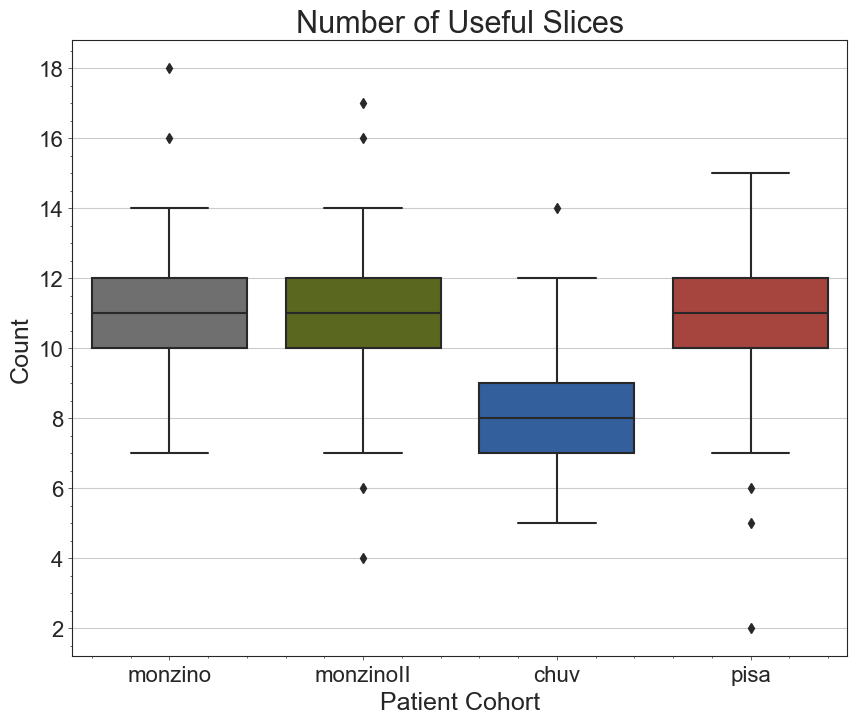

In [86]:
import matplotlib as mpl
colors = {
    "chuv":"#215CAF",
    "monzino":"#6F6F6F",
    "monzinoII":"#627313",
    "pisa":"#B7352D"
}
sns.set_style("ticks")
# plt.bar(x=df["Hospital"], height=df["useful_n_slices_SD"], color=cmap(norm(df['useful_n_slices_SD'])))
# sns.barplot(x=df["Hospital"], y=df["useful_n_slices_SD"], palette=colors, width=0.7)
g=sns.boxplot(df, x="Hospital", y="useful_n_slices_SD", palette=colors)
plt.ylabel("Count", fontsize=18)
plt.xlabel("Patient Cohort", fontsize=18)
g.tick_params(labelsize=16)
plt.title("Number of Useful Slices")
plt.grid(axis='y')
# plt.tick_params(direction="in")

<AxesSubplot: xlabel='Scar_FWHM', ylabel='useful_n_slices_SD'>

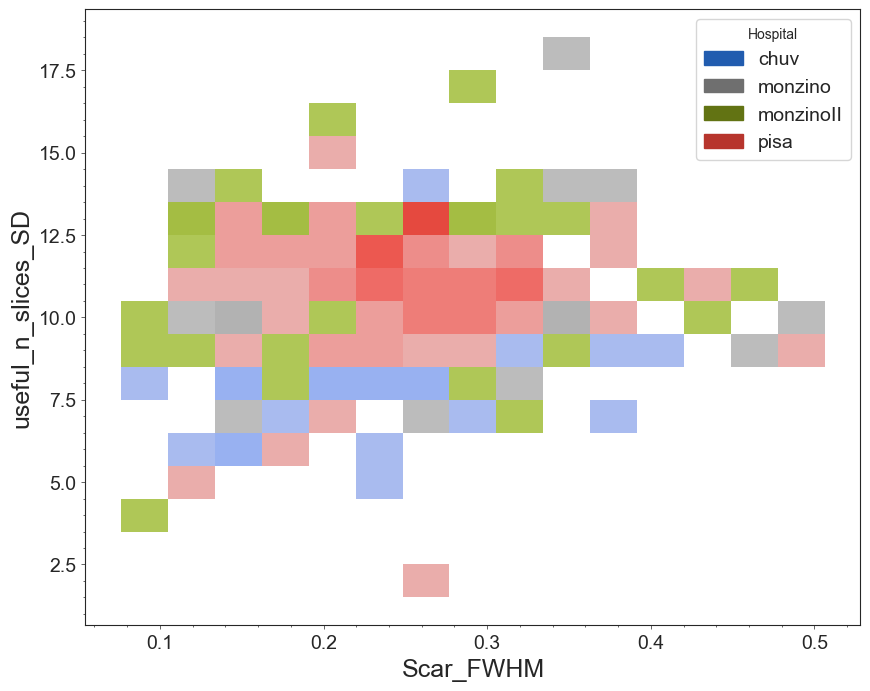

In [10]:
sns.histplot(df, x="Scar_FWHM", y="useful_n_slices_SD", hue="Hospital", palette=colors, discrete=(False, True))

In [ ]:
def outlier_limits(series:pd.Series):
    per25 = series.quantile(0.25)
    per75 = series.quantile(0.75)
    iqr = per75 - per25
    upper = per75 + 1.5*iqr
    lower = per25 - 1.5*iqr
    print(f"Lower limit: {lower}, Upper limit: {upper}")
    return lower, upper

In [ ]:
lower, upper = outlier_limits(df.useful_n_slices_SD)
edge_cases = df[df.useful_n_slices_SD>upper]
edge_cases.columns

Lower limit: 7.0, Upper limit: 15.0


Index(['useful_n_slices_FWHM', 'useful_n_slices_SD', 'Dice_SD2_FWHM',
       'ordered_slices', 'n_voxels', 'Hospital', 'PatientID', 'n_slices',
       'slice_dim', 'Quality', 'Slice_thickness', 'Epicardium',
       'Endocardium|Lumen', 'Myocardium-healthy_patches', 'Healthy_patch 1',
       'Healthy_patch 2', 'Empty', 'Myocardium', 'Scar_SD2', 'Scar_SD5',
       'Scar_FWHM'],
      dtype='object')

In [11]:
col = "Scar_SD2"
lower, upper = outlier_limits(df[col])
for hospital in df.Hospital.unique():
    aux = df[df.Hospital==hospital]
    print(f"Useful Slices {hospital}: {aux[col].mean():.3f} + {aux[col].std():.3f}")
print(f"\nUseful Slices: {df[col].mean():.3f} + {df[col].std():.3f}")

NameError: name 'outlier_limits' is not defined

In [ ]:
df.columns

Index(['useful_n_slices_SD', 'ordered_slices', 'n_voxels', 'Hospital',
       'PatientID', 'n_slices', 'slice_dim', 'Quality', 'Slice_thickness',
       'Epicardium', 'Endocardium|Lumen', 'Myocardium-healthy_patches',
       'Healthy_patch 1', 'Healthy_patch 2', 'Empty', 'Myocardium', 'Scar_SD2',
       'Scar_SD5', 'Scar_FWHM'],
      dtype='object')

In [ ]:
string = df.loc[1,"Quality"].split("{")[1].split("}")[0]



In [ ]:
a = df.Quality.value_counts()


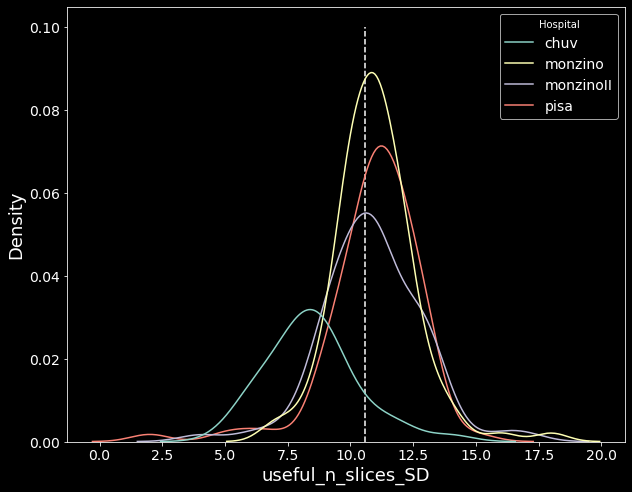

In [ ]:
key = "useful_n_slices_SD"
groupby = "Hospital"

# For numerical columns we can use get_kde_plot for visualization
get_dist_plot_from_csv(path=csv_file, key=key, groupby=groupby, all=False, plot="kde",ymax=0.1)

In [13]:
def reorder_by(dataframe, by):
    aux = None
    for val in natsorted(dataframe[by].unique()):
        if aux is None:
            aux = dataframe[dataframe[by]==val]
        else:
            aux = pd.concat((aux, dataframe[dataframe[by]==val]))
    return aux.reset_index(drop=True)




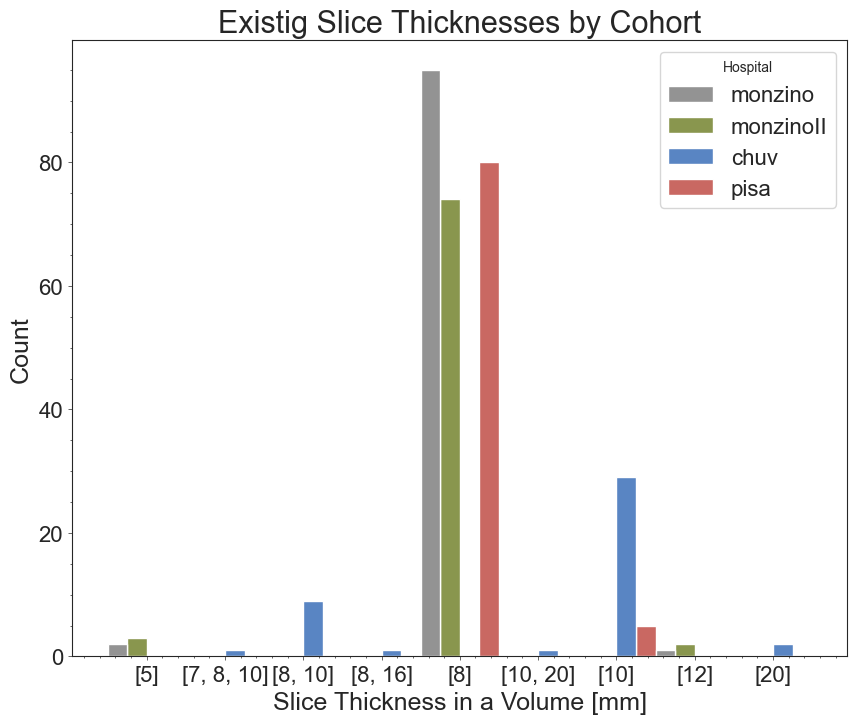

In [84]:
df = reorder_by(df, "summary_slice_thickness")
g = sns.histplot(df, hue="Hospital", x="summary_slice_thickness", palette=colors, multiple="dodge")
plt.xlabel("Slice Thickness in a Volume [mm]", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("Existig Slice Thicknesses by Cohort")
g.tick_params(labelsize=16)
g.tick_params(labelsize=16)
sns.move_legend(g, "upper right", fontsize=16)


<AxesSubplot: xlabel='summary_slice_thickness', ylabel='useful_n_slices_SD'>

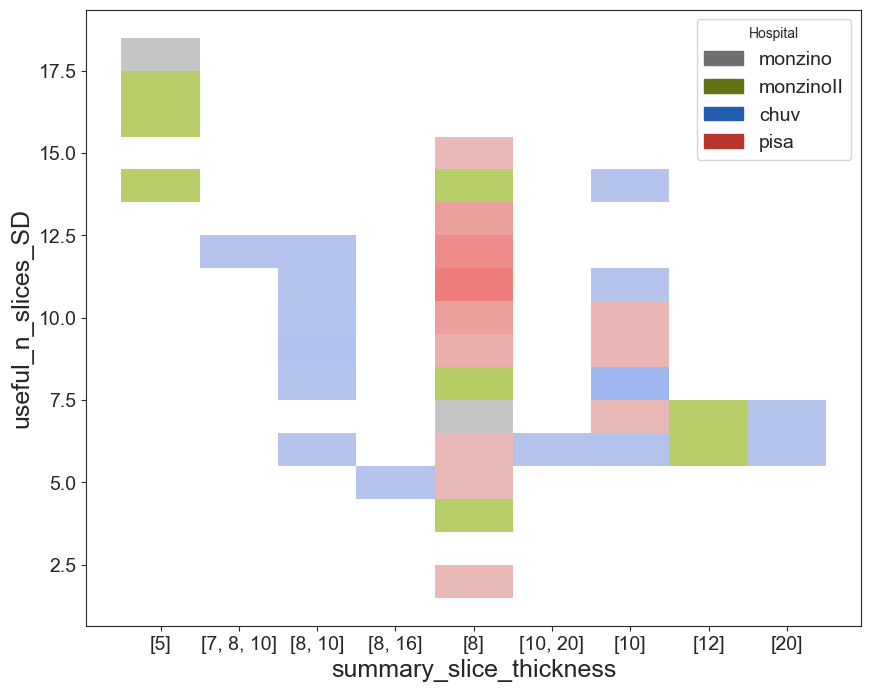

In [ ]:
sns.histplot(df, y="useful_n_slices_SD", x="summary_slice_thickness", hue="Hospital", palette=colors, discrete=(True, True))

In [ ]:
df.columns

Index(['useful_n_slices_FWHM', 'useful_n_slices_SD', 'Dice_SD2_FWHM',
       'ordered_slices', 'n_voxels', 'Hospital', 'PatientID', 'n_slices',
       'slice_dim', 'Quality', 'Slice_thickness', 'Epicardium',
       'Endocardium|Lumen', 'Myocardium-healthy_patches', 'Healthy_patch 1',
       'Healthy_patch 2', 'Empty', 'Myocardium', 'Scar_SD2', 'Scar_SD5',
       'Scar_FWHM', 'summary_slice_thickness'],
      dtype='object')

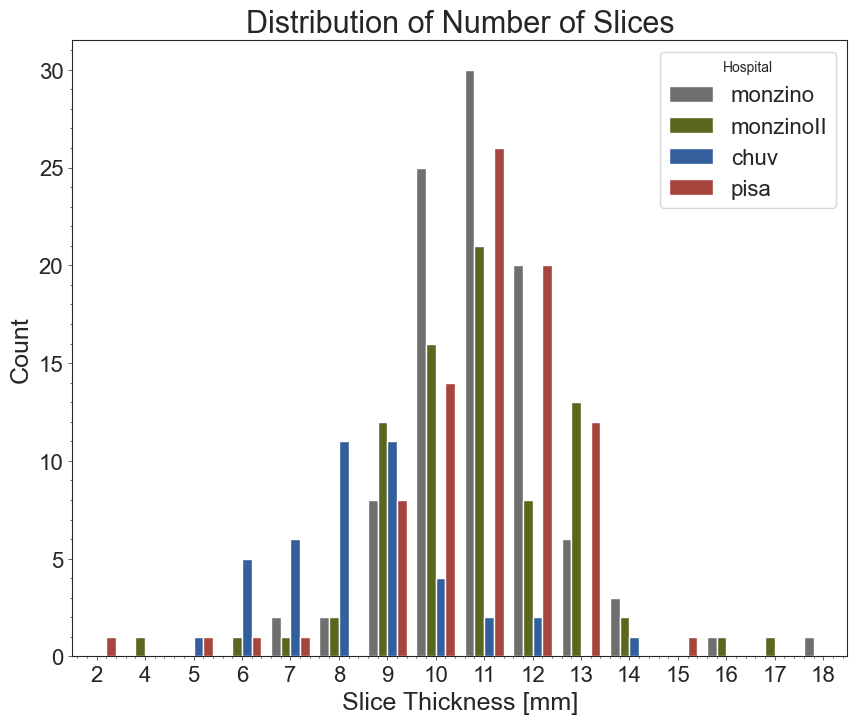

In [83]:
# ax = sns.histplot(data=df, x="useful_n_slices_SD", hue="Hospital", palette=colors, kde=True,multiple="dodge")
colors = {
    "chuv":"#215CAF",
    "monzino":"#6F6F6F",
    "monzinoII":"#627313",
    "pisa":"#B7352D"
}
ax = sns.countplot(data=df, x="useful_n_slices_SD", hue="Hospital", palette=colors)
plt.title("Distribution of Number of Slices")
plt.xlabel("Slice Thickness [mm]", fontsize=18)
plt.ylabel("Count", fontsize=18)
ax.tick_params(labelsize=16)
sns.move_legend(ax, "upper right", fontsize=16)

Text(0.5, 0, 'Slice thickness [mm]')

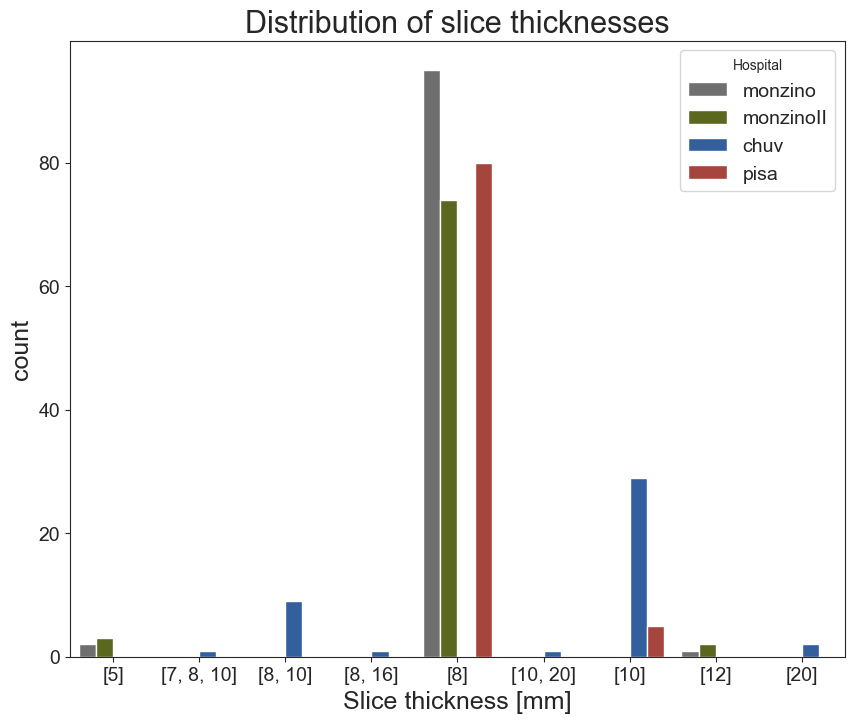

In [11]:
df = reorder_by(df, "summary_slice_thickness")
ax = sns.countplot(data=df, x="summary_slice_thickness", hue="Hospital", palette=colors)
plt.title("Distribution of slice thicknesses")
plt.xlabel("Slice thickness [mm]")

In [7]:
total = 0
for i in range(len(df)):
    # if len(eval(df.loc[i, "summary_slice_thickness"])) > 1:
    #     total += 1
    if df.loc[i, "n_slices"] !=  df.loc[i, "useful_n_slices_SD"]:
        total += 1
total/len(df), total

(0.8688524590163934, 265)

In [60]:
data_path
centers = ["chuv", "pisa", "monzino", "monzinoII"]
sd2 = np.zeros((144,144))
sd5 = np.zeros((144,144))
fwhm = np.zeros((144,144))
imgs = np.zeros((144,144))
n_slices = 0
for center in centers:
    path = os.path.join(data_path, center)
    patients = [f.path for f in os.scandir(path) if os.path.isdir(f.path)]
    for patient in patients:
        mask = np.load(os.path.join(patient, "labels.npy"))
        img = np.load(os.path.join(patient, "images.npy"))
        indices = [6,7,8,9]
        take = np.sum(np.sum(mask[...,indices], axis=3), (1,2))!= 0
        mask = mask[take]
        img = img[take]
        n_slices += len(mask)
        imgs += np.sum(img, axis=0)
        sd2 += np.sum(mask[...,7], axis=0)
        sd5 += np.sum(mask[...,8], axis=0)
        fwhm += np.sum(mask[...,9], axis=0)
fwhm /= n_slices
sd2 /= n_slices
sd5 /= n_slices
imgs /= n_slices

In [63]:
from Helpers.utils import parse_json_file
all = parse_json_file(r"C:\Users\JAVIER\OneDrive\Escritorio\ETH\Year 2\Spring 2023\Semester Project\scarnetwork-pytorch\DataLoader\data_partition_8_slices.json")

In [68]:
len(all["test"])

42

In [59]:
df[df.useful_n_slices_SD >=8].useful_n_slices_SD.sum()

3099

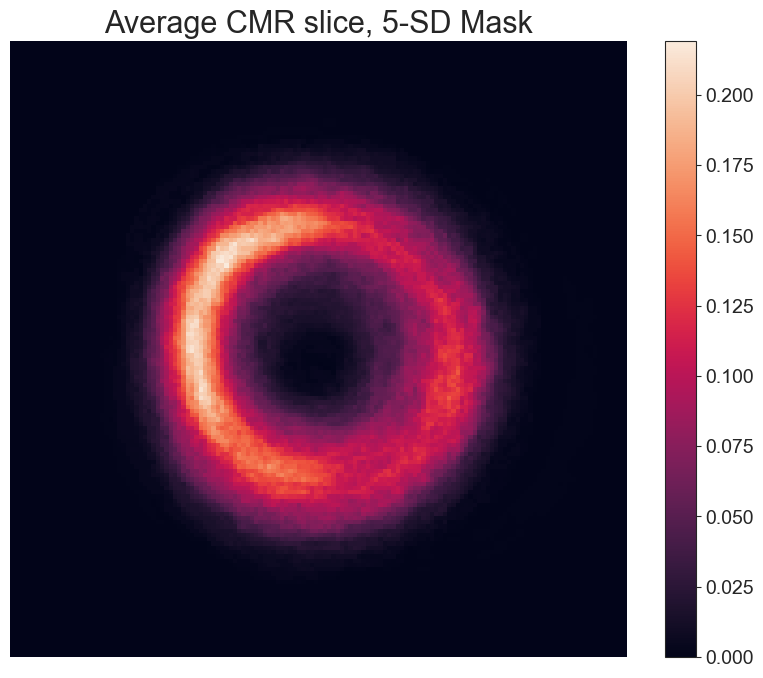

In [57]:
plt.imshow(sd2, vmin=0, vmax=np.max(sd2))
plt.axis('off')
plt.title("Average CMR slice, 5-SD Mask")
plt.colorbar()

Text(0.5, 9.444444444444438, 'Number of Useful Slices')

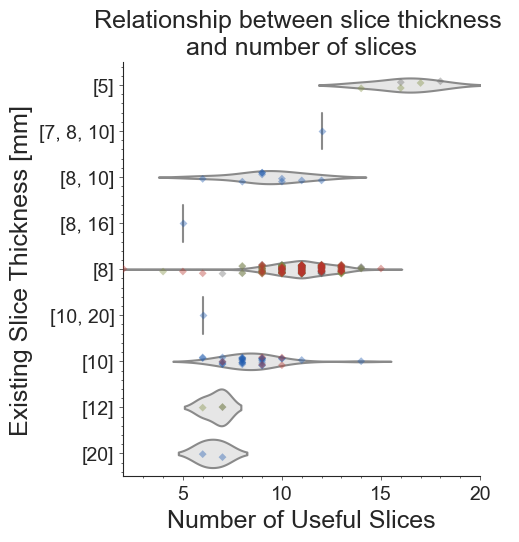

In [99]:
ax = sns.catplot(data=df, x="useful_n_slices_SD", y="summary_slice_thickness", kind="violin", color=".9", inner=None, alpha=0.5);

# ax = sns.catplot(data=df, x="useful_n_slices_SD", y="summary_slice_thickness", kind="swarm", hue="Hospital", palette=colors);

ax = sns.stripplot(data=df, x="useful_n_slices_SD", y="summary_slice_thickness", hue="Hospital", palette=colors, jitter=True, s=4, marker="D", alpha=0.4)
# sns.swarmplot(data=df, x="useful_n_slices_SD", y="summary_slice_thickness", size=3)
ax.set_xlim([2,20])
plt.legend([],[], frameon=False)
plt.title("Relationship between slice thickness \nand number of slices", fontsize=18)
plt.ylabel("Existing Slice Thickness [mm]")
plt.xlabel("Number of Useful Slices")


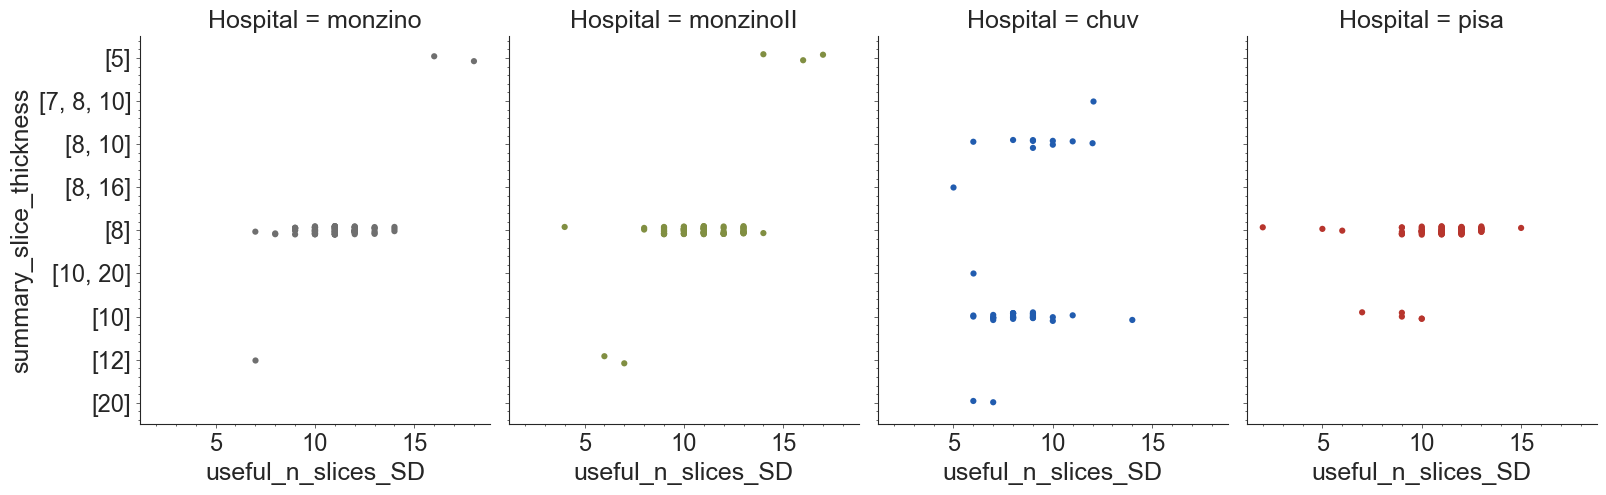

In [98]:
g=sns.catplot(data=df, x="useful_n_slices_SD", y="summary_slice_thickness", hue="Hospital", jitter=True,palette=colors, col="Hospital", aspect=0.8, s=20)
g.tick_params(labelsize=17)

In [90]:
colors["monzinoII"] = "#818F42"

((9, 16), 16)

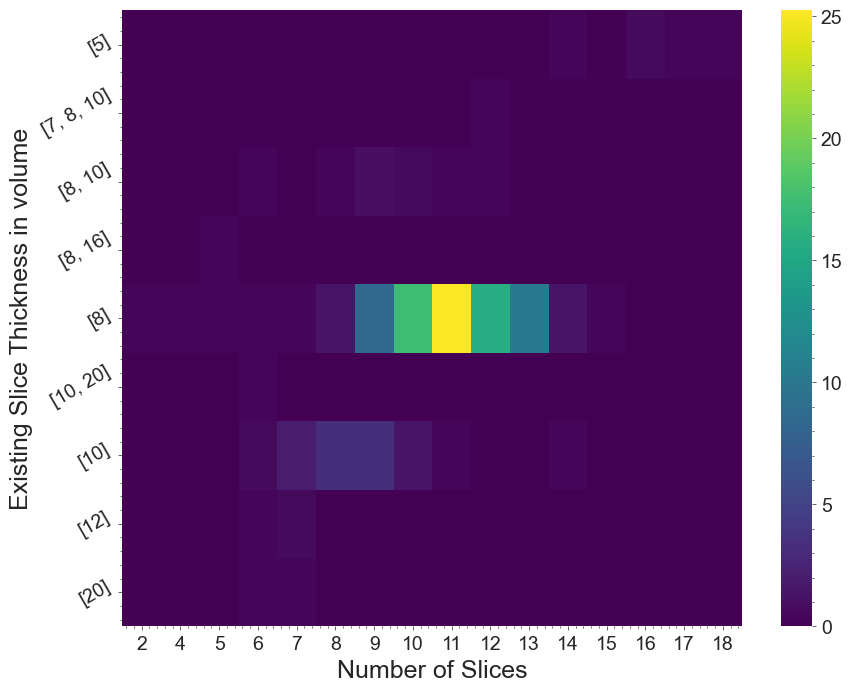

In [64]:
matrix = np.zeros((len(df["summary_slice_thickness"].unique()), len(df["useful_n_slices_SD"].unique())))
for i, s_thickness in enumerate(df["summary_slice_thickness"].unique()):
    aux = df[df["summary_slice_thickness"]==s_thickness].reset_index(drop=True)
    for j, n_s in enumerate(sorted(df["useful_n_slices_SD"].unique())):
        aux2 = aux[aux["useful_n_slices_SD"]==n_s].reset_index(drop=True)
        matrix[i,j]+=100*len(aux2)/len(df)
g = sns.heatmap(matrix,cmap="viridis")
# plt.colorbar()
# plt.xticks()
g.set_xticklabels(sorted(df["useful_n_slices_SD"].unique()))
g.set_yticklabels(natsorted(df["summary_slice_thickness"].unique()))
g.set_yticklabels(g.get_yticklabels(), rotation=30)
plt.xlabel("Number of Slices")
plt.ylabel("Existing Slice Thickness in volume")
# g.yticks(rotation = 90)
matrix.shape, len(df["useful_n_slices_SD"].unique())

array([16, 18, 14, 17, 12,  9, 10,  8,  6, 11,  5, 13,  7,  4, 15,  2],
      dtype=int64)

array([[2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [267]:
from scipy.stats import pearsonr
avg_thickness = [np.median(t) for t in df.Slice_thickness]
pearsonr(avg_thickness, df.useful_n_slices_SD)

PearsonRResult(statistic=-0.5429332348119327, pvalue=8.795854977824395e-25)

In [253]:
df.columns

Index(['useful_n_slices_FWHM', 'useful_n_slices_SD', 'Dice_SD2_FWHM',
       'ordered_slices', 'n_voxels', 'Hospital', 'PatientID', 'n_slices',
       'slice_dim', 'Quality', 'Slice_thickness', 'Epicardium',
       'Endocardium|Lumen', 'Myocardium-healthy_patches', 'Healthy_patch 1',
       'Healthy_patch 2', 'Empty', 'Myocardium', 'Scar_SD2', 'Scar_SD5',
       'Scar_FWHM', 'summary_slice_thickness'],
      dtype='object')

[5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 8.333333333333334,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 12.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 

In [13]:

big = df.loc[np.argmax(df["useful_n_slices"]),:]
p = os.path.join(data_path , big["Hospital"] , big["PatientID"])

images = np.load(os.path.join(p,"images.npy"))
labels = np.load(os.path.join(p,"labels.npy"))

indices = [6, 7, 8]
labels = np.sum(labels[...,indices], axis=3)
take = np.sum(labels, (1,2))!= 0
labels[take]
sum(take)


KeyError: 'useful_n_slices'

In [12]:
import numpy as np
path = r"C:\Users\JAVIER\OneDrive\Escritorio\ETH\Year 2\Spring 2023\Semester Project\scarnetwork-pytorch\Data\chuv\p24"
image = np.load(os.path.join(path,"labels.npy"))[...,6:9].sum(axis=3)
thickness = np.load(os.path.join(path,"slice_thickness.npy"))
thickness.shape, image.shape

((10,), (10, 144, 144))

In [13]:
data_type = vtk.VTK_FLOAT
D, H, W = image.shape
# H, W, D = image.shape

flat_data_array = image.flatten()
vtk_data = numpy_support.numpy_to_vtk(num_array=image.ravel(order="F"), deep=True, array_type=data_type)

img = vtk.vtkImageData()
img.GetPointData().SetScalars(vtk_data)
img.SetDimensions(image.shape[0], image.shape[1], image.shape[2])
img.SetSpacing([int(thickness[0]), 1, 1])
img.SetOrigin([0,0,0])

writer = vtk.vtkMetaImageWriter()
writer.SetFileName(r"C:\Users\JAVIER\OneDrive\Escritorio\ETH\Year 2\Spring 2023\Semester Project\scarnetwork-pytorch\del\scar.mhd")
writer.SetInputData(img)
writer.Write()

In [88]:
a = np.ascontiguousarray(image).tobytes()

In [ ]:
imdata = vtk.vtkImageData()
depthArray = numpy_support.numpy_to_vtk(image.ravel(order='F'), deep=True, array_type=vtk.VTK_DOUBLE)

imdata.SetDimensions(image.shape)
imdata.SetSpacing([20,1,1])
imdata.SetOrigin([0,0,0])
imdata.GetPointData().SetScalars(depthArray)

colorFunc = vtk.vtkColorTransferFunction()
# colorFunc.AddRGBPoint(1, 1, 0.0, 0.0) # Red
colorFunc.AddRGBPoint(2, 0.0, 1, 0.0) # Green

opacity = vtk.vtkPiecewiseFunction()

volumeProperty = vtk.vtkVolumeProperty()
volumeProperty.SetColor(colorFunc)
volumeProperty.SetScalarOpacity(opacity)
volumeProperty.SetInterpolationTypeToLinear()
volumeProperty.SetIndependentComponents(2)

volumeMapper = vtk.vtkOpenGLGPUVolumeRayCastMapper()
volumeMapper.SetInputData(imdata)
volumeMapper.SetBlendModeToMaximumIntensity()


volume = vtk.vtkVolume()
volume.SetMapper(volumeMapper)
volume.SetProperty(volumeProperty)

# writer = vtk.vtkMetaImageWriter()
# writer.SetFileName(r"C:\Users\JAVIER\OneDrive\Escritorio\ETH\Year 2\Spring 2023\Semester Project\scarnetwork-pytorch\del\test.mhd")
# writer.SetInputData(volume)
# writer.Write()

ren = vtk.vtkRenderer()
ren.AddVolume(volume)
ren.SetBackground(0,0,0)

renWin = vtk.vtkRenderWindow()
renWin.AddRenderer(ren)
renWin.SetSize(900, 900)

interactor = vtk.vtkRenderWindowInteractor()
interactor.SetRenderWindow(renWin)

interactor.Initialize()
renWin.Render()
interactor.Start()

In [ ]:
vtk.vtkImageData

In [ ]:
# vtkImageData is the vtk image volume type
imdata = vtk.vtkImageData()
# this is where the conversion happens
depthArray = numpy_support.numpy_to_vtk(image.ravel(), deep=True, array_type=vtk.VTK_DOUBLE)

# fill the vtk image data object
imdata.SetDimensions(data.shape)
imdata.SetSpacing([1,1,1])
imdata.SetOrigin([0,0,0])
imdata.GetPointData().SetScalars(depthArray)

# f.ex. save it as mhd file
writer = vtk.vtkMetaImageWriter()
writer.SetFileName("test.mhd")
writer.SetInputData(imdata)
writer.Write()

In [ ]:
import vtk
import numpy as np

def save_as_vti(arr, filename):
    # Create the VTK image data
    imageData = vtk.vtkImageData()
    imageData.SetDimensions(arr.shape)
    imageData.SetSpacing(1, 1, 1)
    imageData.SetOrigin(0, 0, 0)

    # Allocate space for the data and copy it over
    imageData.AllocateScalars(vtk.VTK_FLOAT, 1)
    vtk_array = imageData.GetPointData().GetScalars()
    vtk_array.SetVoidArray(arr.flatten(), arr.size, 1)

    # Write the VTI file
    writer = vtk.vtkXMLImageDataWriter()
    writer.SetFileName(filename)
    writer.SetInputData(imageData)
    writer.Write()

    print(f"Saved {filename} successfully!")
